__Sparks Internship Task-1__

__Importing libraries__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Importing File__

In [3]:
data=pd.read_csv("scores.csv")

__Understanding Data__

In [5]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


__Data Visualization__

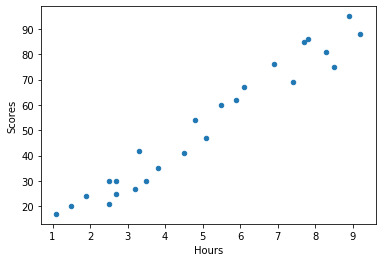

In [8]:
data.plot(kind="scatter",x="Hours",y="Scores")
plt.show()

In [9]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
hours=data["Hours"]
scores=data["Scores"]

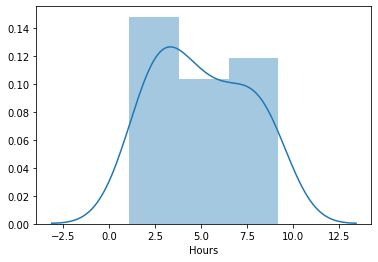

In [12]:
sns.distplot(hours)

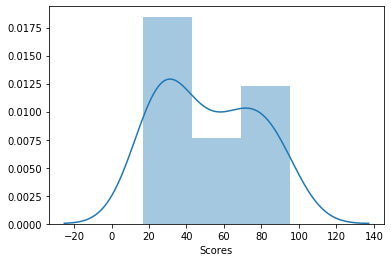

In [13]:
sns.distplot(scores)

__Linear Regression__

In [14]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

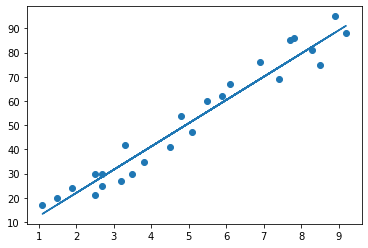

In [17]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [18]:
y_pred=reg.predict(x_test)

In [20]:
actual_predicted=pd.DataFrame({"Target":y_test,"Predicted":y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


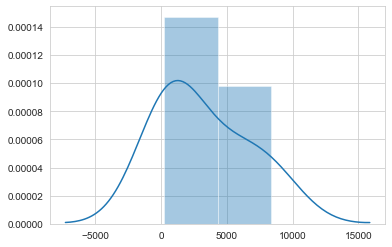

In [22]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test*y_pred))
plt.show()

__what would be the predicted score of a student if he studies for 9.25 hours__

In [24]:
h=9.25
s=reg.predict([[h]])
print("if a student studies for {} hours per day he/she will score {} % in exams".format(h,s) )

if a student studies for 9.25 hours per day he/she will score [91.56986604] % in exams


__Model Evaluation__

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score : ",r2_score(y_test,y_pred))

Mean Absolute Error :  4.5916495300630285
R2 Score :  0.971014141329942
